# Lab Report
*Jakub Skalski, 314007*

In [1]:
library("ellipse")
library("ggplot2")

confidence.ellipse = function(mu, sigma, levels=seq(0, 1, 0.1), rescale = TRUE) {
	diago = eigen(sigma)
	vectors = diago$vectors %*% diag(sqrt(diago$values)) + mu
	arrow.size = arrow(length=unit(0.3, 'cm'))

	plotz = ggplot() + geom_path() + theme_bw() +
		geom_segment(aes(x=mu[1], y=mu[2], xend=vectors[1,1], yend=vectors[2,1]), arrow = arrow.size, color = "darkred") +
		geom_segment(aes(x=mu[1], y=mu[2], xend=vectors[1,2], yend=vectors[2,2]), arrow = arrow.size, color = "darkblue")
	
	if (!rescale)
		plotz = plotz + coord_equal()
		
	for (level in levels) {
		ellipse_data1 = ellipse(x = sigma, centre = mu, level = level)
		plotz = plotz + geom_path(data = ellipse_data1, aes(x, y), color = "black", alpha=sqrt(1-level))
	}

	return(plotz)
}

is_within_ellipse = function(x, y, mu, sigma, level = 0.68) {
  return( t(v - mu) %*% solve(sigma) %*% (c(x, y) - mu) <= qchisq(level, df=2) )
}

make.plots = function(sample) {
	par(mfrow = c(1, 2))
	options(repr.plot.width=18, repr.plot.height=6)

	hist(sample, density=20, breaks=200, prob=TRUE, main="Histogram")
	curve(dnorm(x, mean=mean(sample), sd=sqrt(var(sample))), col="darkred", lwd=3, add=TRUE)

	qqnorm(sample, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))
	qqline(sample, col="darkred", lwd=3)
}


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




## Problem 1
$$
A = \begin{bmatrix}
3 & -1\\
-1 & 3
\end{bmatrix}	
$$

1. Since $A = A^T$ A is symmetric.
2. After solving $det(A - λI) = 0$, we obtain $λ_1 = 2, λ_2 = 4$ and their corresponding eigenvectors $v_1 = \begin{bmatrix} 1\\1 \end{bmatrix}, v_2 = \begin{bmatrix} 1\\-1 \end{bmatrix}$. $\\$
And so the decomposition is such that $P = \frac{1}{\sqrt{2}}\begin{bmatrix} v_1 & v_2 \end{bmatrix}$ and $Λ = diag(λ_1, λ_2)$.
3. $A = \begin{bmatrix} 1 & 1\\1 & 1 \end{bmatrix} +  \begin{bmatrix} 2 & -2\\-2 & 2 \end{bmatrix}$
4. $\sqrt{A} = \frac{1}{2}\begin{bmatrix} \sqrt{2}+2 & \sqrt{2}-2\\\sqrt{2}-2 & \sqrt{2}+2 \end{bmatrix}$

## Problem 2

1. Since $e_i^Te_i = 1$ and $e_i^Te_j = 0$ for  $i\ne j$

	$P^TP = \begin{bmatrix} e_1^T \\ - \\ ... \\ - \\e_n^T \end{bmatrix} \begin{bmatrix} e_1 & | & ... & | & e_n \end{bmatrix} = \begin{bmatrix} e_1^Te_1  & ...  & e_1^Te_n \\ ... & ... & ... \\ e_n^Te_1 & ... & e_n^Te_n  \end{bmatrix} = I$

2. We can prove this by induction. Assume $det(Λ_n) = \prod_i^n{λ_i}$ and show that it holds for $n+1$ by $n+1$ matrix too.
	To that end we perform laplace expansion on the n+1-th row:
	$$det(Λ_{n+1}) = det(Λ_n) * λ_{n+1} + 0 ... + 0$$ 
	Therefore, by our inductive hypothesis,  $det(Λ_{n+1}) = \prod_i^{n+1}{λ_i}$.
3. Using the fact 2. and $det(P) = det(P^T) = ±1$ we have:
$$det(A) = det(PΛP^T) = det(P) det(Λ) det(P^T) = det(Λ)$$
4. Suppose $Λ = diag(λ_1, λ_2, ... , λ_n)$ then:
$$Λ^{-1} = diag(λ_1^{-1}, λ_2^{-1}, ..., λ_n^{-1})$$
5. It suffices to show that $AA^{-1} = I$:
$$AA^{-1} = (PΛP^T)(PΛ^{-1}P^T) = PΛΛ^{-1}P^T = PP^T = I$$
6. Check all statements on the example of Problem 1.

In [2]:
# 6.
A = matrix(c(3, -1, -1, 3), nrow=2)
e = eigen(A)

# 6.1
cat("P * P^T =\n")
print(round(e$vectors %*% t(e$vectors), 16))

# 6.2
cat("\ndet(A) =", det(A), "\n")
cat("Π(λi) =", prod(e$values), "\n\n")

# 6.3
cat("det(Λ) =", det(diag(e$values)))

# 6.5
cat("\nTest the inverse\n")
print(round(A %*% e$vectors %*% diag(1/e$values) %*% t(e$vectors), 16))

P * P^T =
     [,1] [,2]
[1,]    1    0
[2,]    0    1

det(A) = 8 
Π(λi) = 8 

det(Λ) = 8
Test the inverse
     [,1] [,2]
[1,]    1    0
[2,]    0    1


## Problem 3

The joint probability density function of p normal distributions with mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ is given by:
$$
f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^p |\boldsymbol{\Sigma}|}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$$

and is characterized by $\frac{p(p+1)}{2}$ parameters.

In [3]:
µ = c(3343, 49.8)
𝞢 = matrix(c(528**2, 0.75, 0.75, 2.5**2), nrow=2)
e = eigen(𝞢); e

eigen() decomposition
$values
[1] 2.787840e+05 6.249998e+00

$vectors
              [,1]          [,2]
[1,] -1.000000e+00  2.690315e-06
[2,] -2.690315e-06 -1.000000e+00


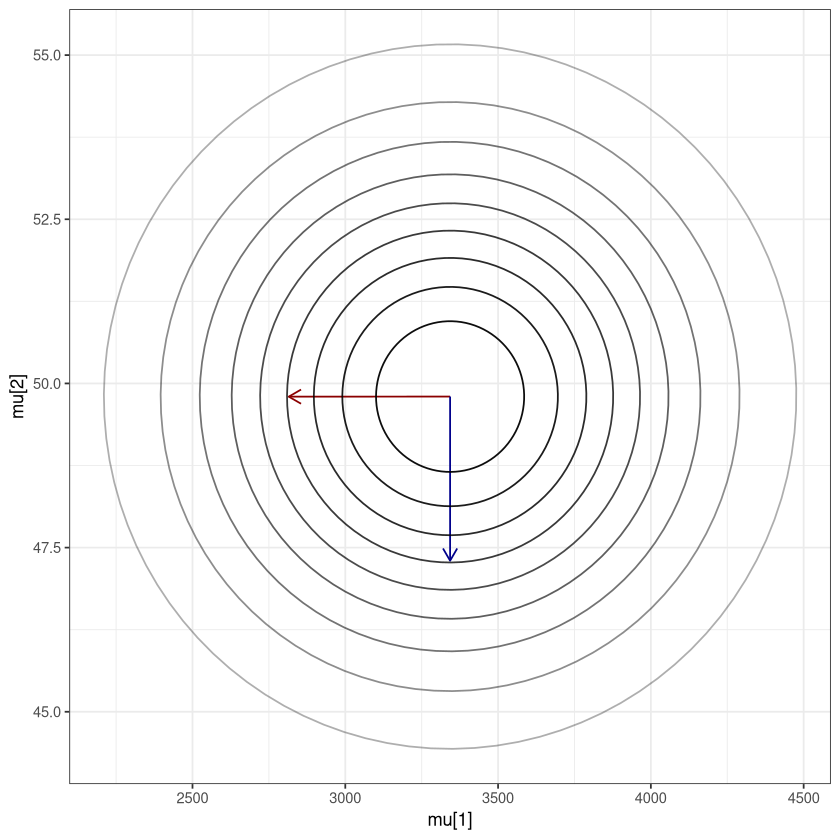

In [4]:
confidence.ellipse(µ, 𝞢)

In [5]:
cat("correlation = ", 0.75/(528 * 2.5))

correlation =  0.0005681818

Correlation between L and W is almost negligible as can be seen on the density plot.$\\$
L is distributed accordingly to N(49.8, 2.5). $\\$
Mean (49.8 cm) is the best guess for the child's length.
With 68% probability the error of this prediction is not larger than one standard deviation of 2.5.

# Problem 4

### Conditional Normal Distribution for Two Normal Distributions

$ L|W=w \sim \mathcal{N}(\mu_L + \rho\frac{\sigma_L}{\sigma_W}(w - \mu_W), \sigma_L^2(1 - \rho^2)) $




In [6]:
cat("mean = ", 49.8 + 0.75*2.5/528*(4025 - 3343), " var = ", (2.5**2) * (1 - 0.75**2))

mean =  52.22187  var =  2.734375

In [7]:
sqrt((2.5**2) * (1 - 0.75**2))

[1] 1.653595

L ~ N(52.22187, 2.734375). $\\$
Mean (52.22187 cm) is the best guess for the child's length.
With 68% probability the error of this prediction is not larger than one standard deviation of 1.65359456941537.
We observe that standard deviation is now smaller from our previous estimate and thus our guess is more accurate.

# Problem 5

$ X 🍌 N(m, s) \\ $
$ aX + b  ⁓  N(am+b, a^2 * s)\\ $
$ X + Y ~ N(m + n, sqrt(a^2 + b^2))\\ $

# Project

### Part One

In [45]:
data = read.table("WeightLength.txt", header = TRUE, sep = "\t")

Using the date estimate the mean and the covariance for the length and the weight
of children.

In [46]:
mean_weight = mean(data$Weight)
mean_length = mean(data$Length)
var_weight = var(data$Weight)
var_length = var(data$Length)
covariance = cov(data$Weight, data$Length)


cat(
	"mean_weight: ", mean_weight,
	"\nmean_length: ", mean_length,
	"\ncovariance: ", covariance
)

mean_weight:  3233.545 
mean_length:  49.23764 
covariance:  915.2955

Verify graphically normal distribution of the data. Use a scatterplot and qq-plots
for the marginal distributions.

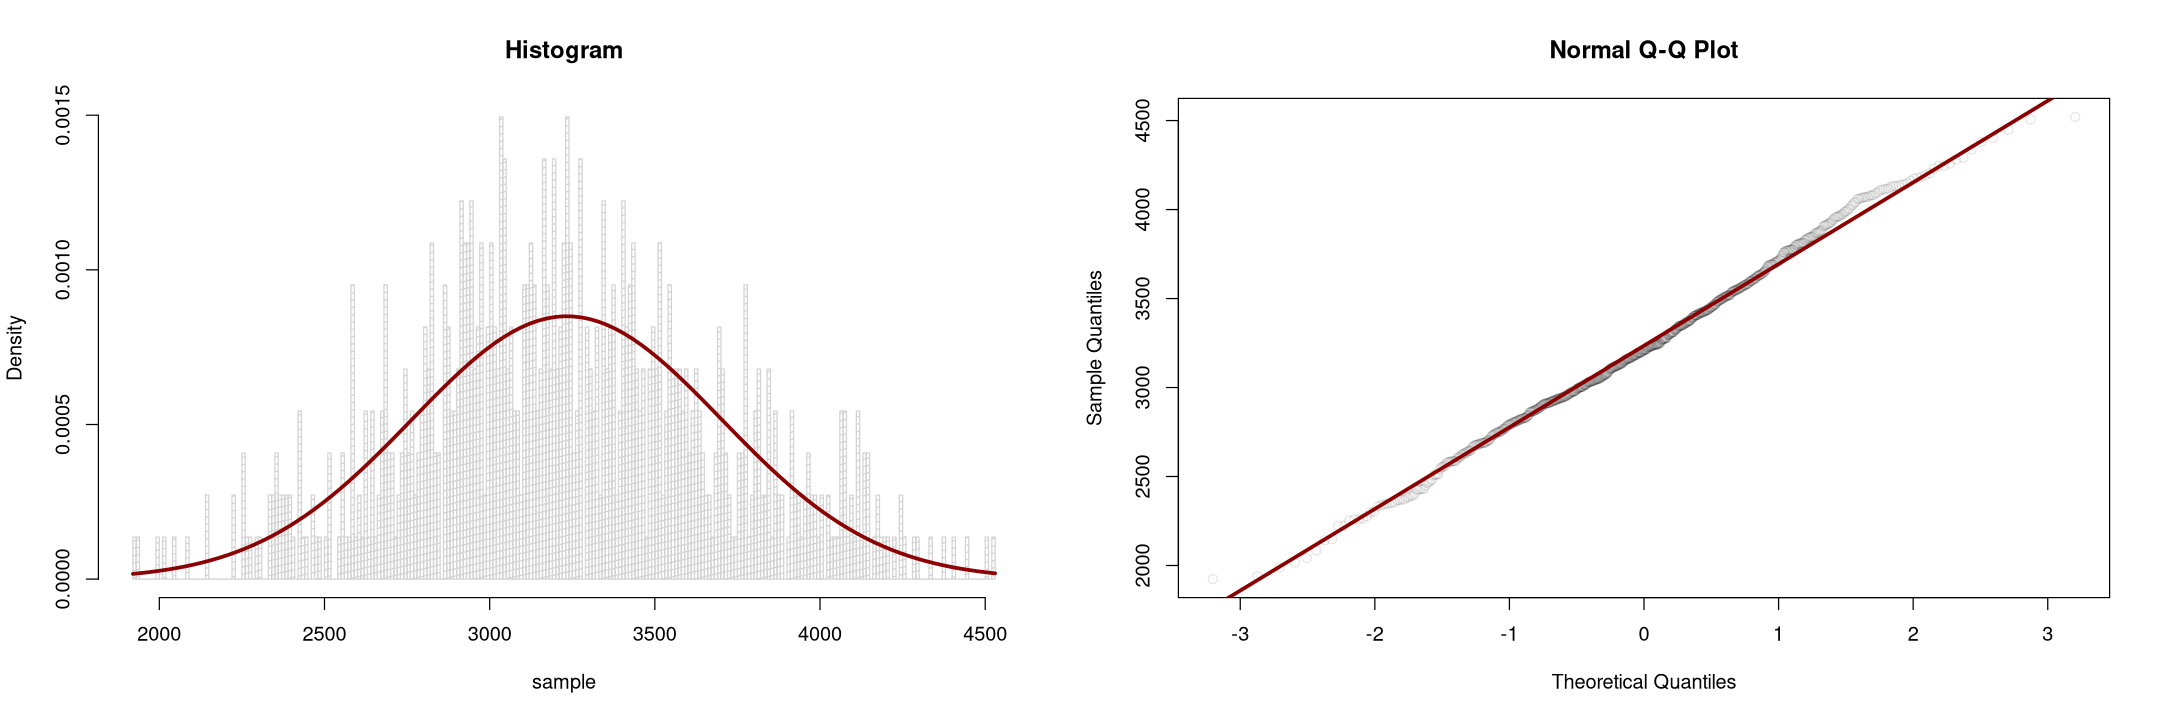

In [47]:
make.plots(data$Weight)

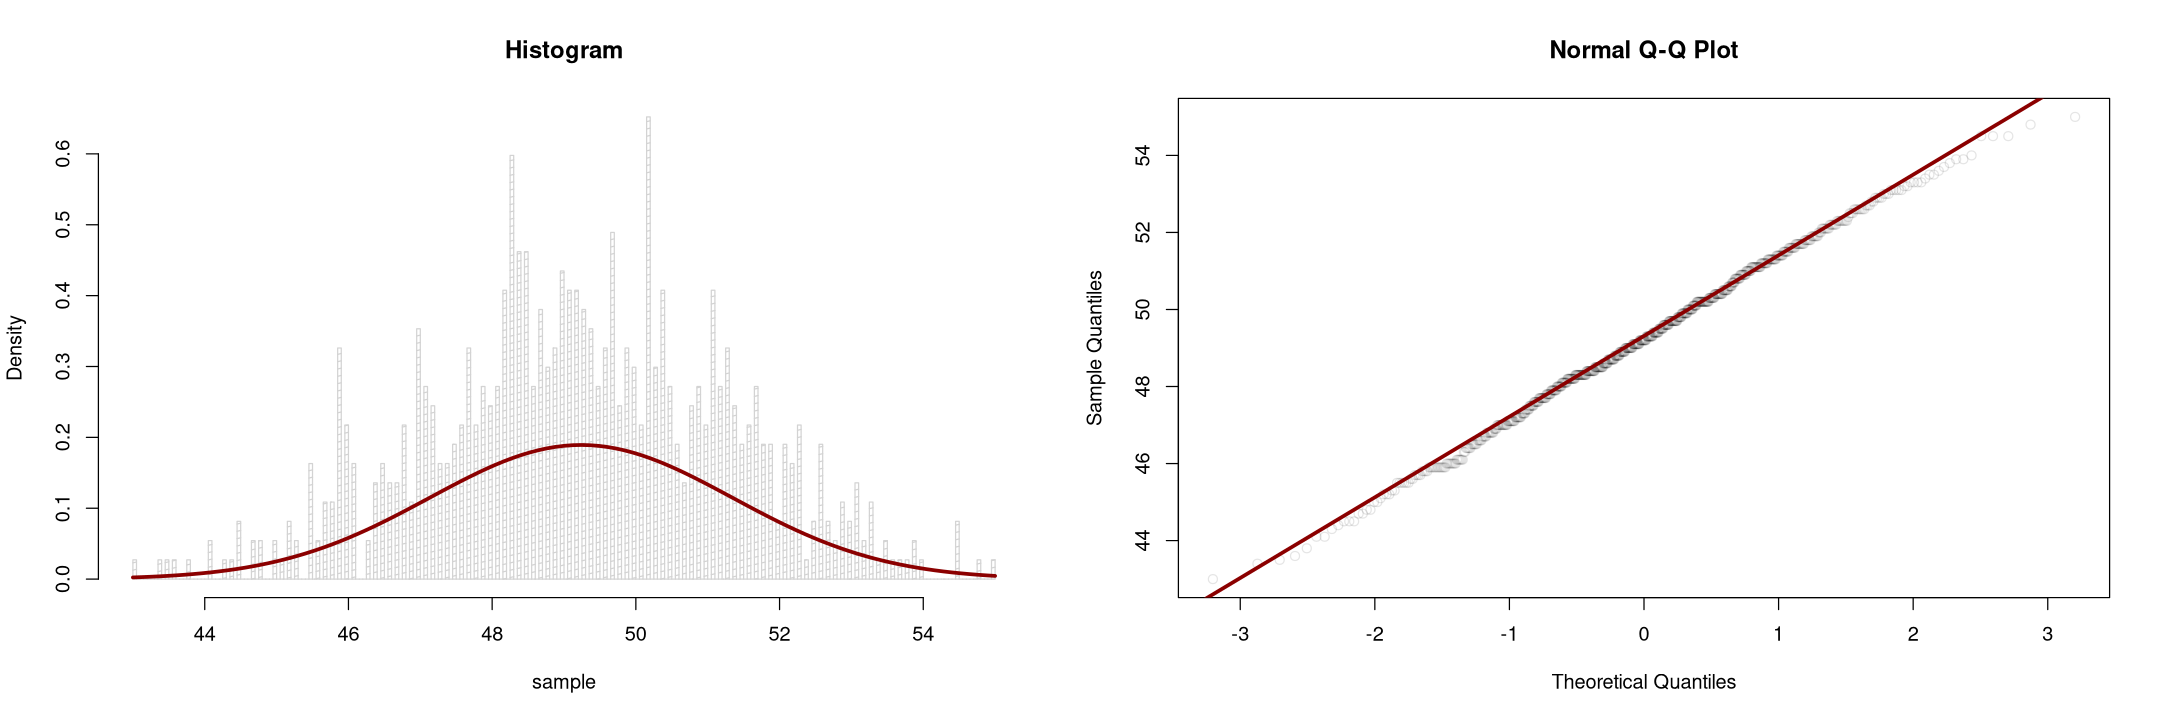

In [48]:
make.plots(data$Length)

Find the ellipsoids that would serve classification regions for scores as described
above.

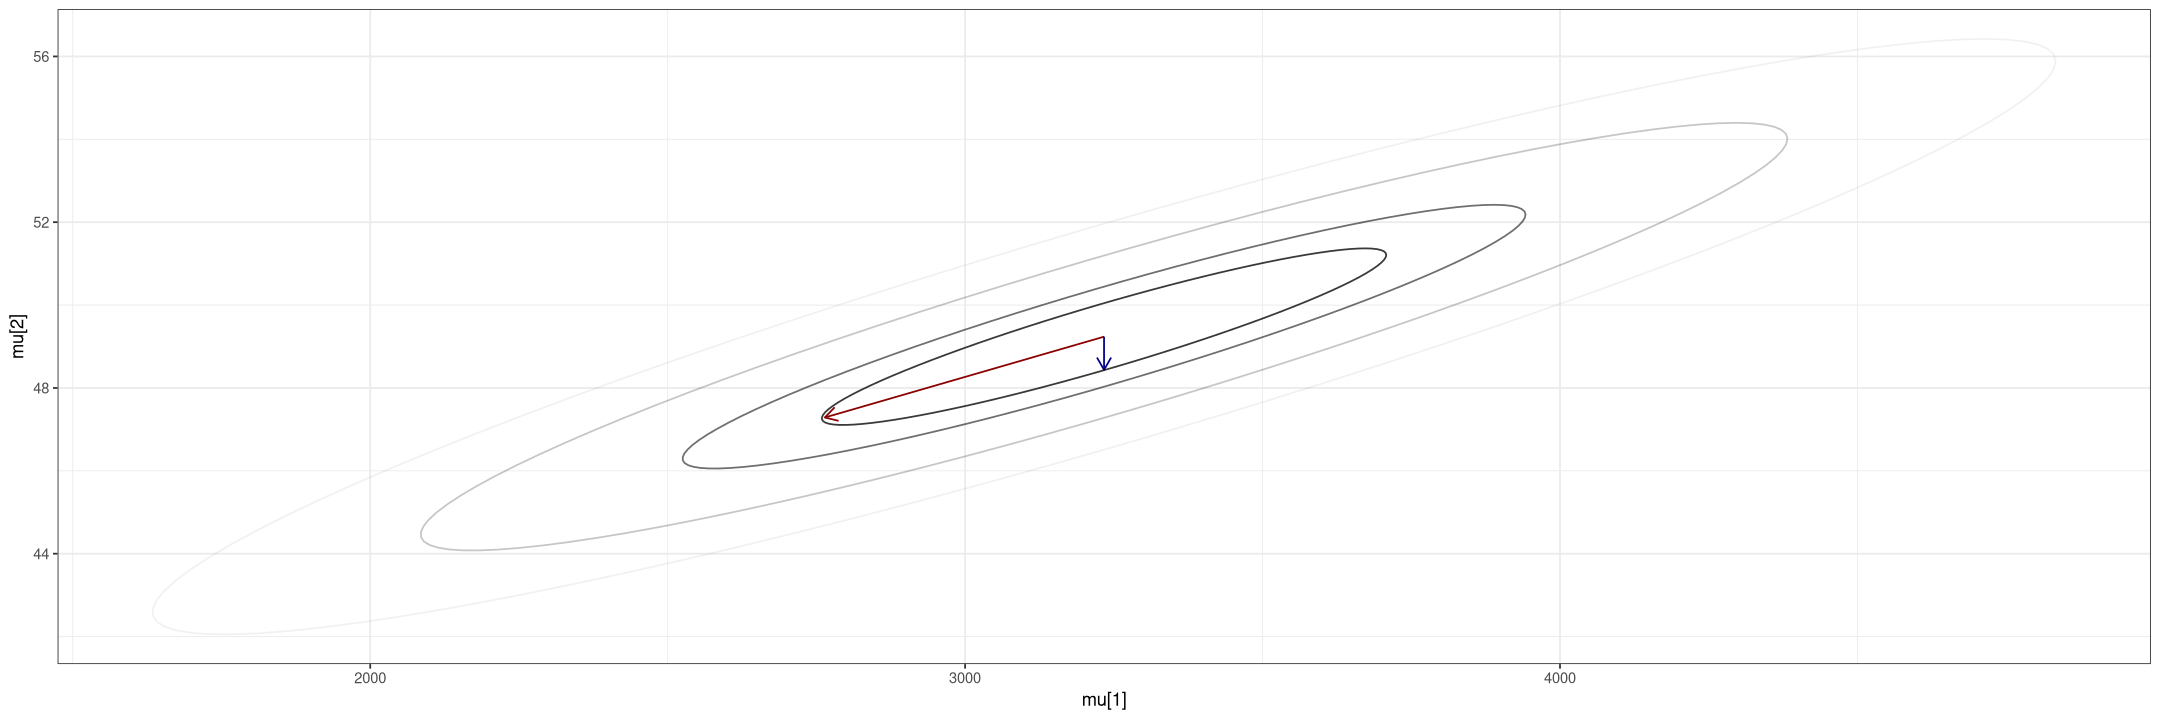

In [51]:
µ = c(mean_weight, mean_length)
𝞢 = matrix(cov(data), nrow=2)
confidence.ellipse(µ, 𝞢, list(0.4, 0.68, 0.95, 0.997)) 

How many children would score zero, one, and two, respectively? Illustrate this
classification on the graphs.

In [65]:
counts = function(data, µ, 𝞢, level = 0.68) {
  res <- 0
  for (i in 1:length(data$Weight)) {
    x <- data$Weight[i]
    y <- data$Length[i]
    if (is_within_ellipse(x, y, µ, 𝞢, level)) {
        res <- res + 1
    }
  }
  res / 763
}

In [66]:
cat("2:", counts(data, µ, 𝞢, level = 0.68))
cat("\n1:", counts(data, µ, 𝞢, level = 0.95) - counts(data, µ, 𝞢, level = 0.68))
cat("\n0:", counts(data, µ, 𝞢, level = 0.997) - counts(data, µ, 𝞢, level = 0.95))

2: 0.6474443
1: 0.2673657
0: 0.04980341

Find the spectral decomposition of the estimated covariance matrix.

In [17]:
e = eigen(𝞢)
P = e$vectors
Λ = diag(e$values)

cat(
	"decomposition:",
	"\nP: ", P,
	"\nΛ: ", Λ
)

decomposition: 
P:  -0.9999914 -0.004155185 0.004155185 -0.9999914 
Λ:  220280.5 0 0 0.6400477

Plot the data transformed according to PT X, where P is the matrix made of the
eigenvectors standing as the columns. Interpret the transformed data.

In [18]:
px = as.matrix(data) %*% t(P)
colnames(px) = c("Weight", "Length")
dpx = as.data.frame(px)

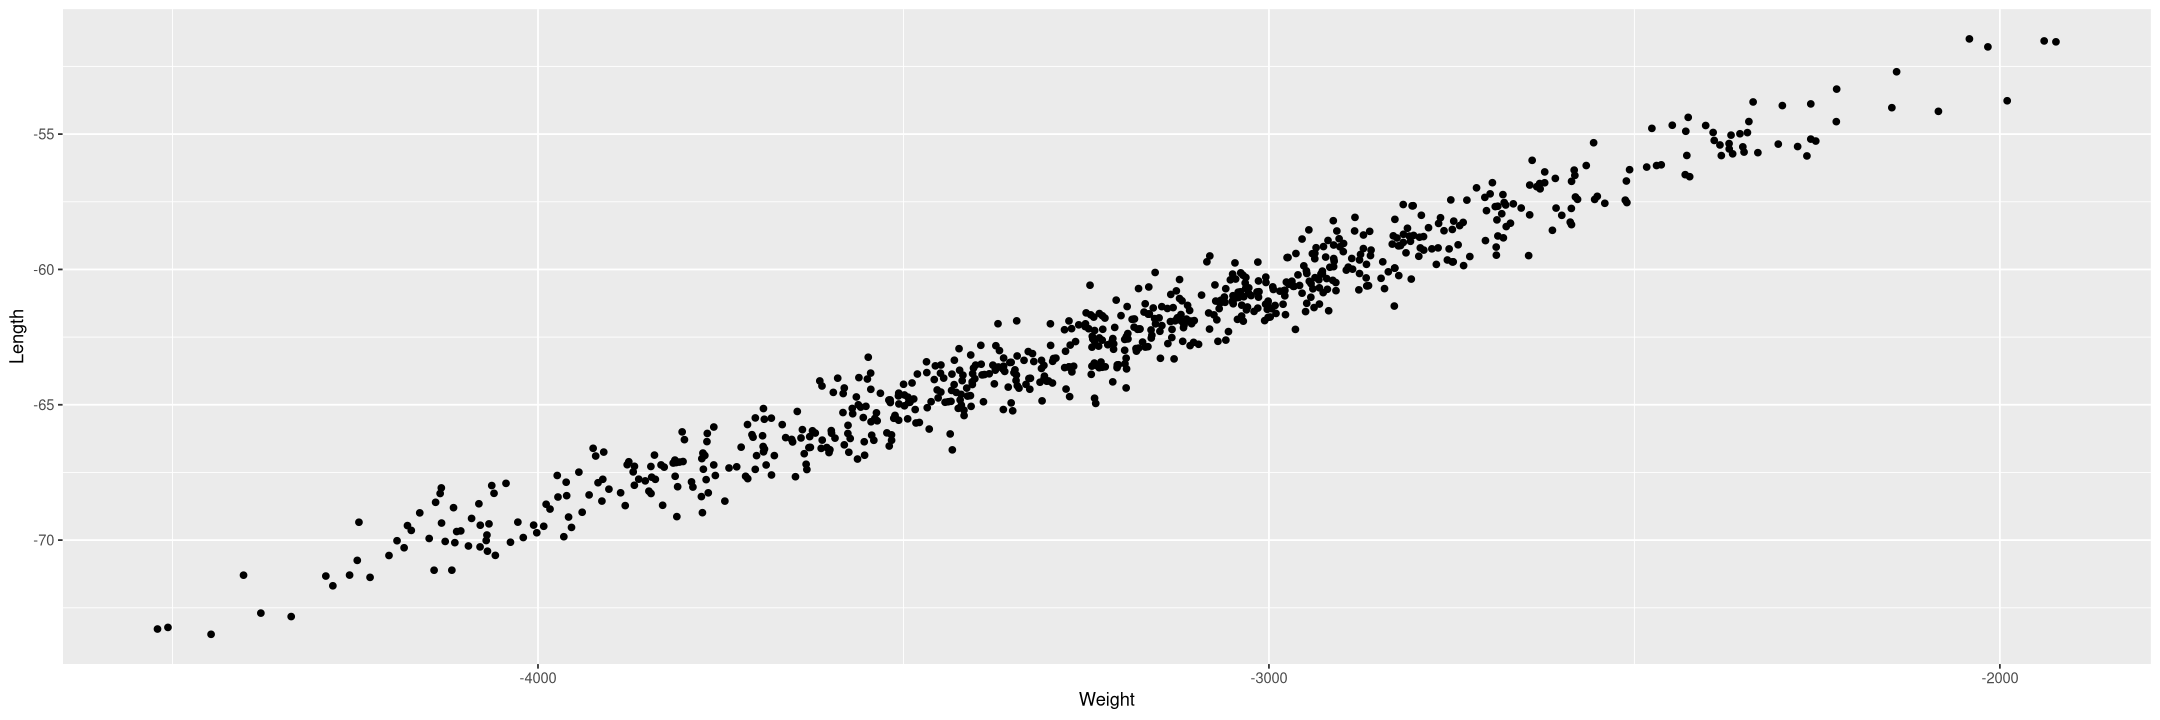

In [19]:
ggplot(dpx, aes(x=Weight, y=Length)) + geom_point()

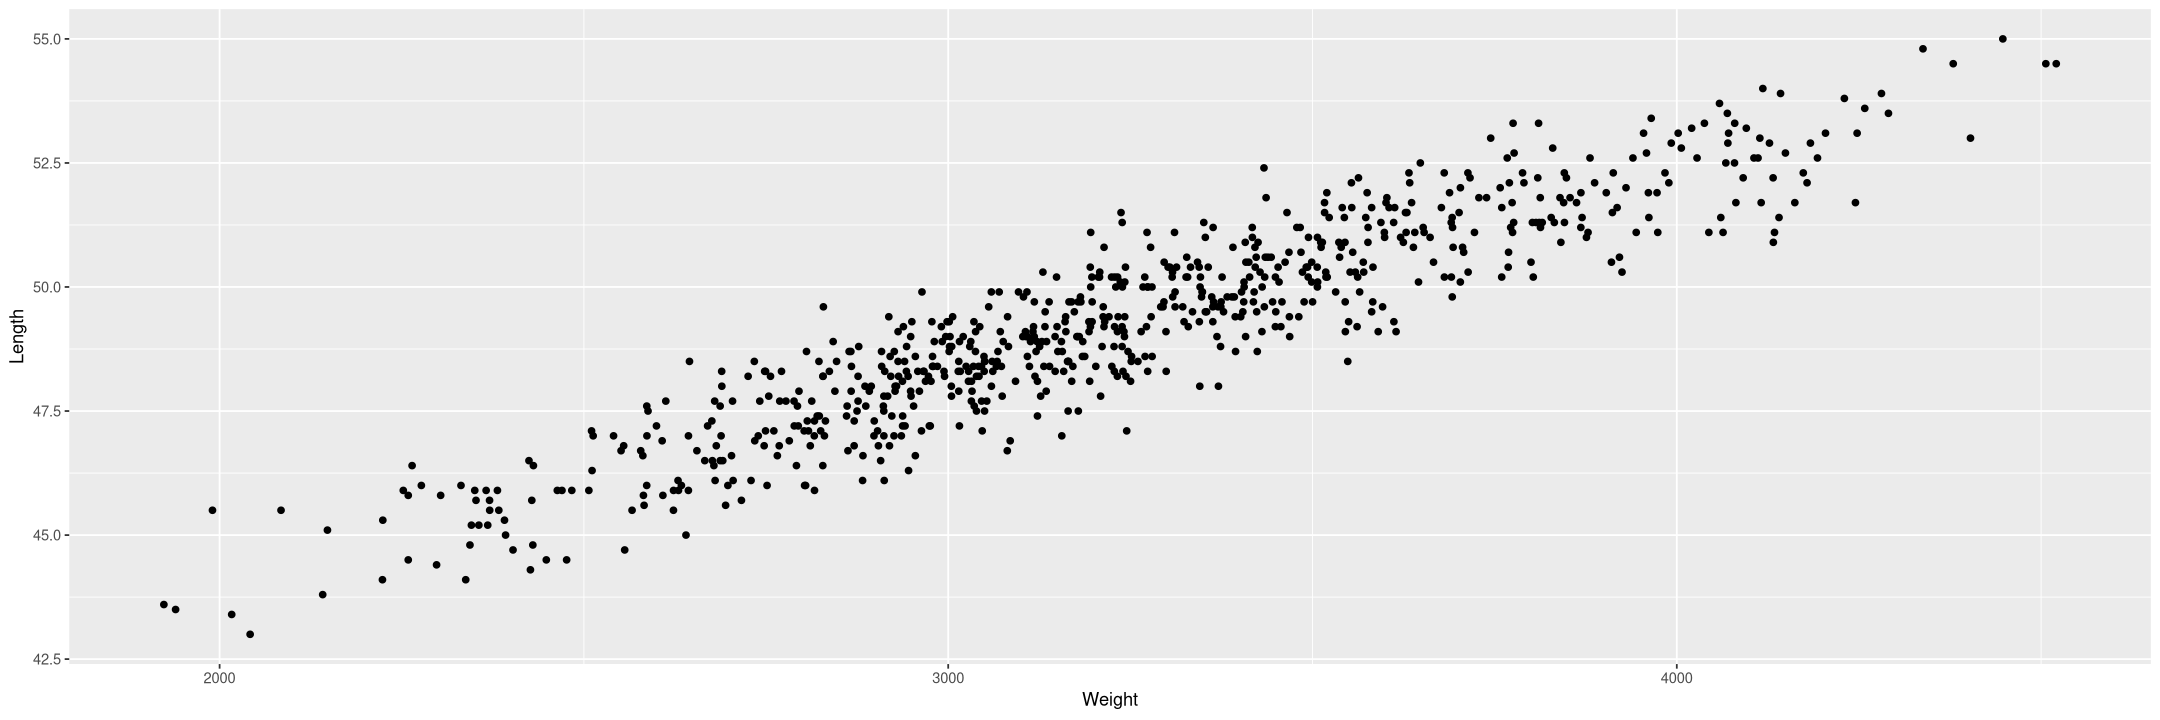

In [20]:
ggplot(data, aes(x=Weight, y=Length)) + geom_point()

### Part Two

In [21]:
data = read.table("ParentsWeightLength.txt", header = TRUE, sep = "\t")

Using the data estimate the mean and the covariance for all four variables

In [22]:
means = colMeans(data)
covrs = cov(data)

In [23]:
µ

[1] 3233.54511   49.23764

In [24]:
covrs

,FatherHeight,MotherHeight,Weight,Length
FatherHeight,12.6120963,0.6310056,931.8590,3.289545
MotherHeight,0.6310056,9.7721065,827.2878,2.852147
Weight,931.8589629,827.2877829,220276.6577,915.295511
Length,3.2895454,2.8521470,915.2955,4.443303


In [25]:
# means
µWL = means[3:4]
µFM = means[1:2]

# covariances
𝞢WL = covrs[3:4, 3:4]
𝞢FM = covrs[1:2, 1:2]
𝞢WLFM = covrs[1:2, 3:4]
𝞢FMWL = covrs[3:4, 1:2]

Verify graphically the normal distribution of the data. Use scatterplots and qq-plots
for the marginal distributions.

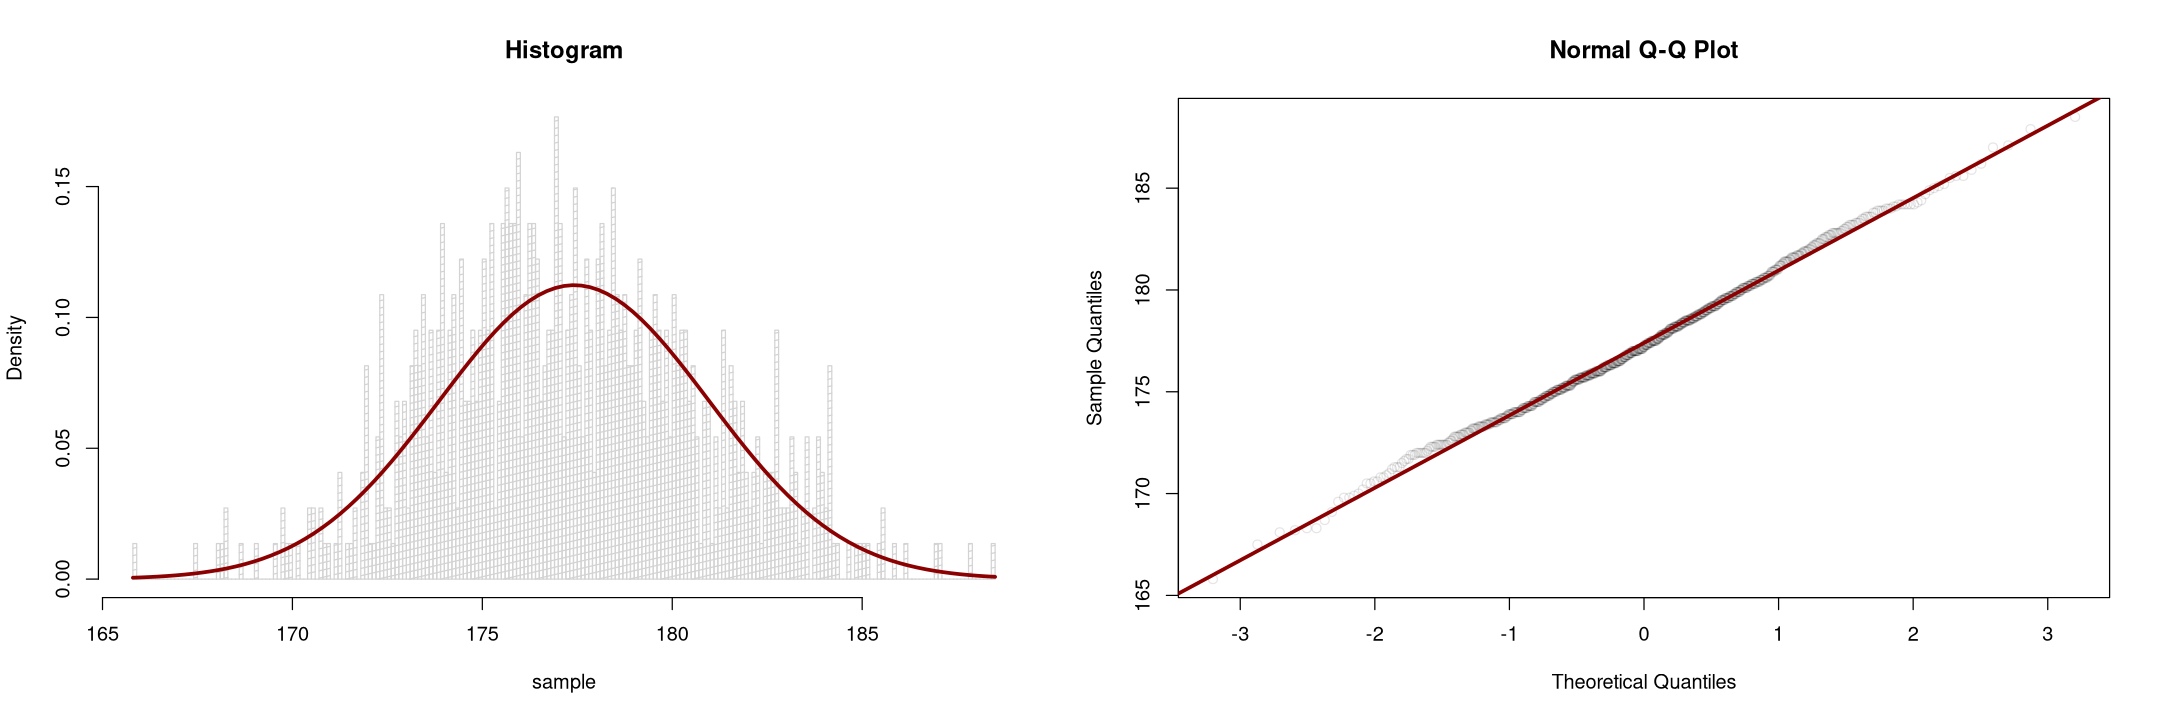

In [26]:
make.plots(data$FatherHeight)

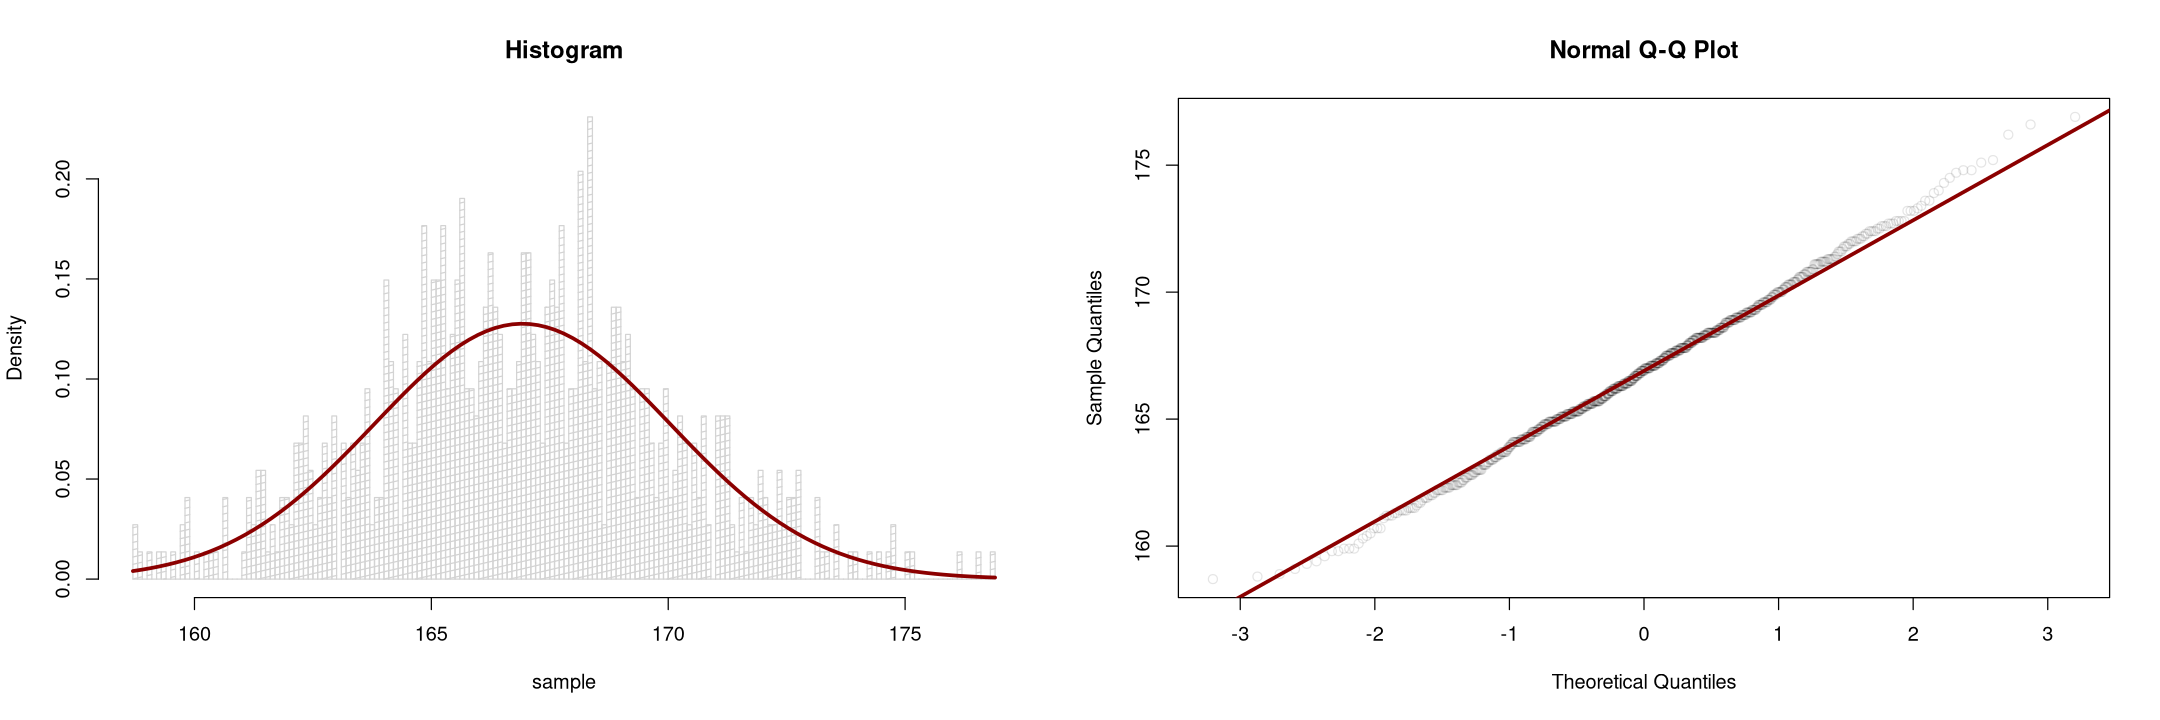

In [27]:
make.plots(data$MotherHeight)

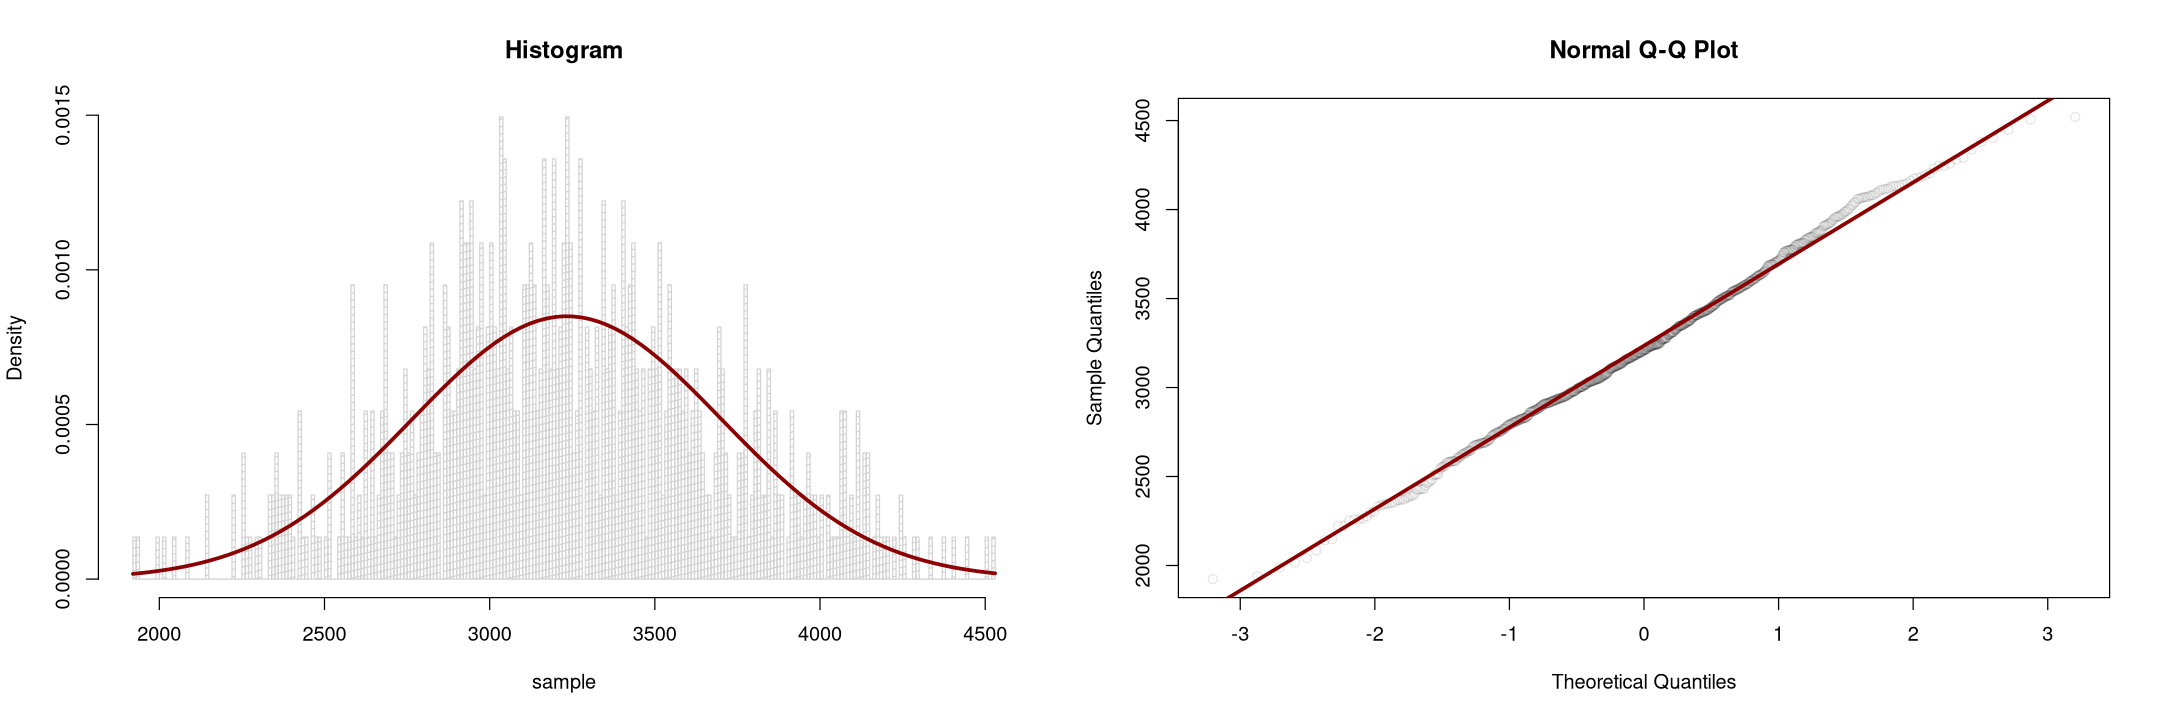

In [28]:
make.plots(data$Weight)

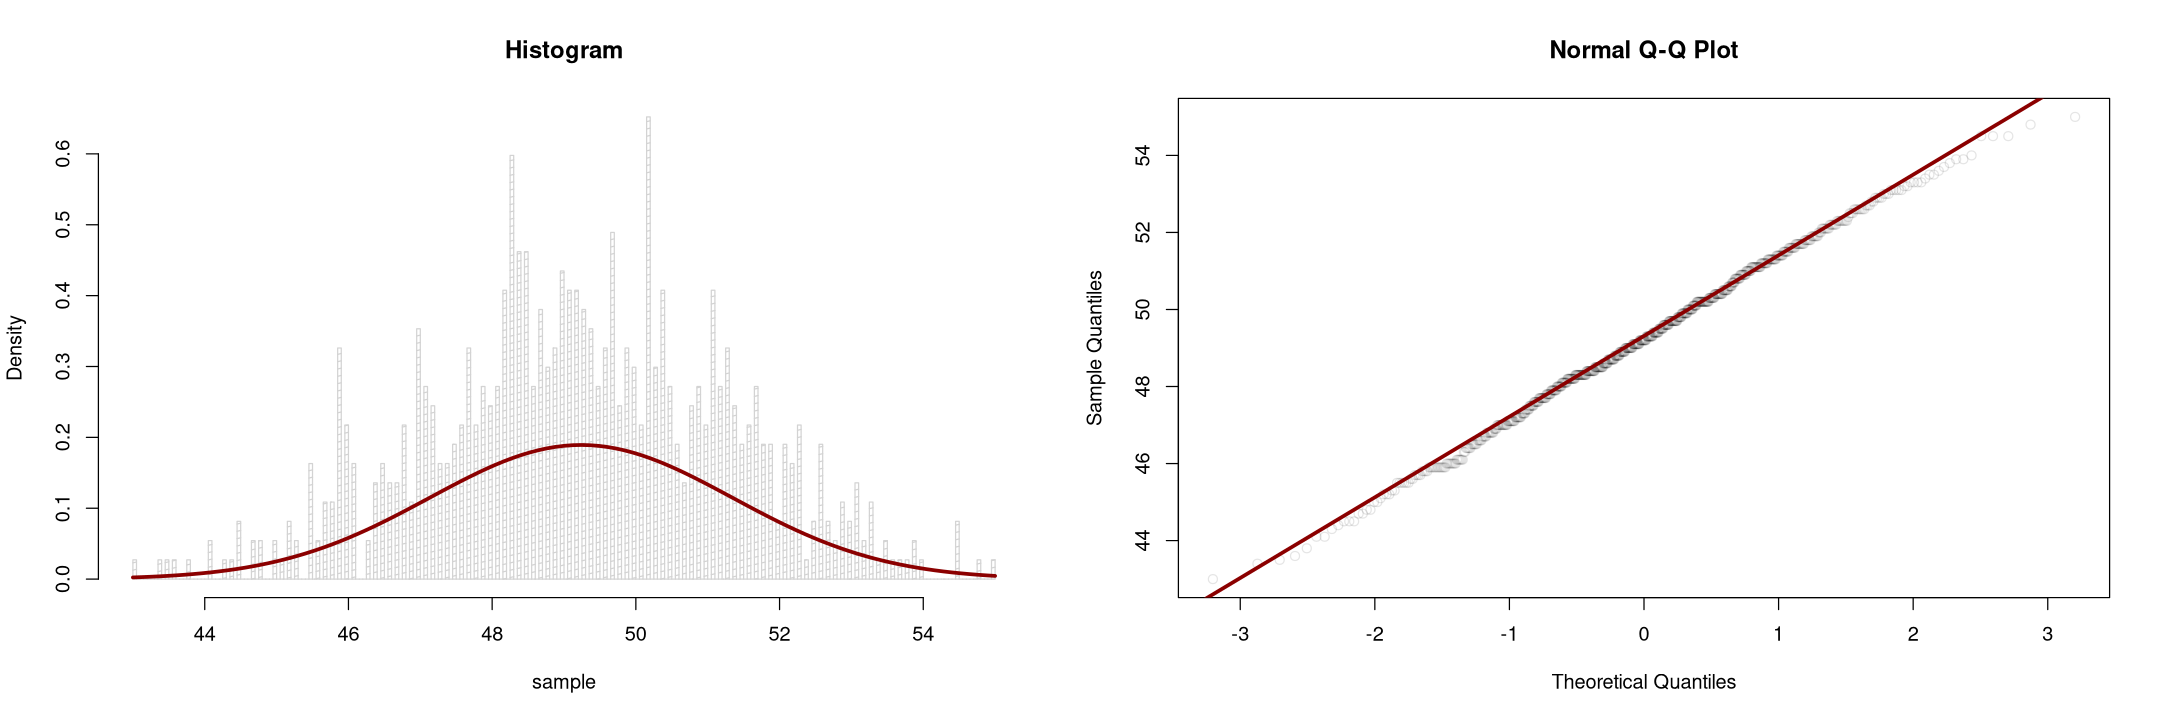

In [29]:
make.plots(data$Length)

Identify the conditional distribution of the weight and length of a child given the
heights of parents. Find an estimate of the covariance matrix of the conditional
distribution and compare it with the original unconditional covariance.

In [30]:
µ = µWL + 𝞢FMWL %*% solve(𝞢FM) %*% (means[c("FatherHeight", "MotherHeight")] - µFM)
𝞢 = 𝞢WL - (𝞢FMWL %*% solve(𝞢FM) %*% 𝞢WLFM) 

In [31]:
µ

Weight,3233.54511
Length,49.23764


In [32]:
𝞢WL

,Weight,Length
Weight,220276.6577,915.295511
Length,915.2955,4.443303


In [33]:
𝞢

,Weight,Length
Weight,88857.9955,456.846078
Length,456.8461,2.843767


How the ellipsoids based on the conditional distribution will look like?

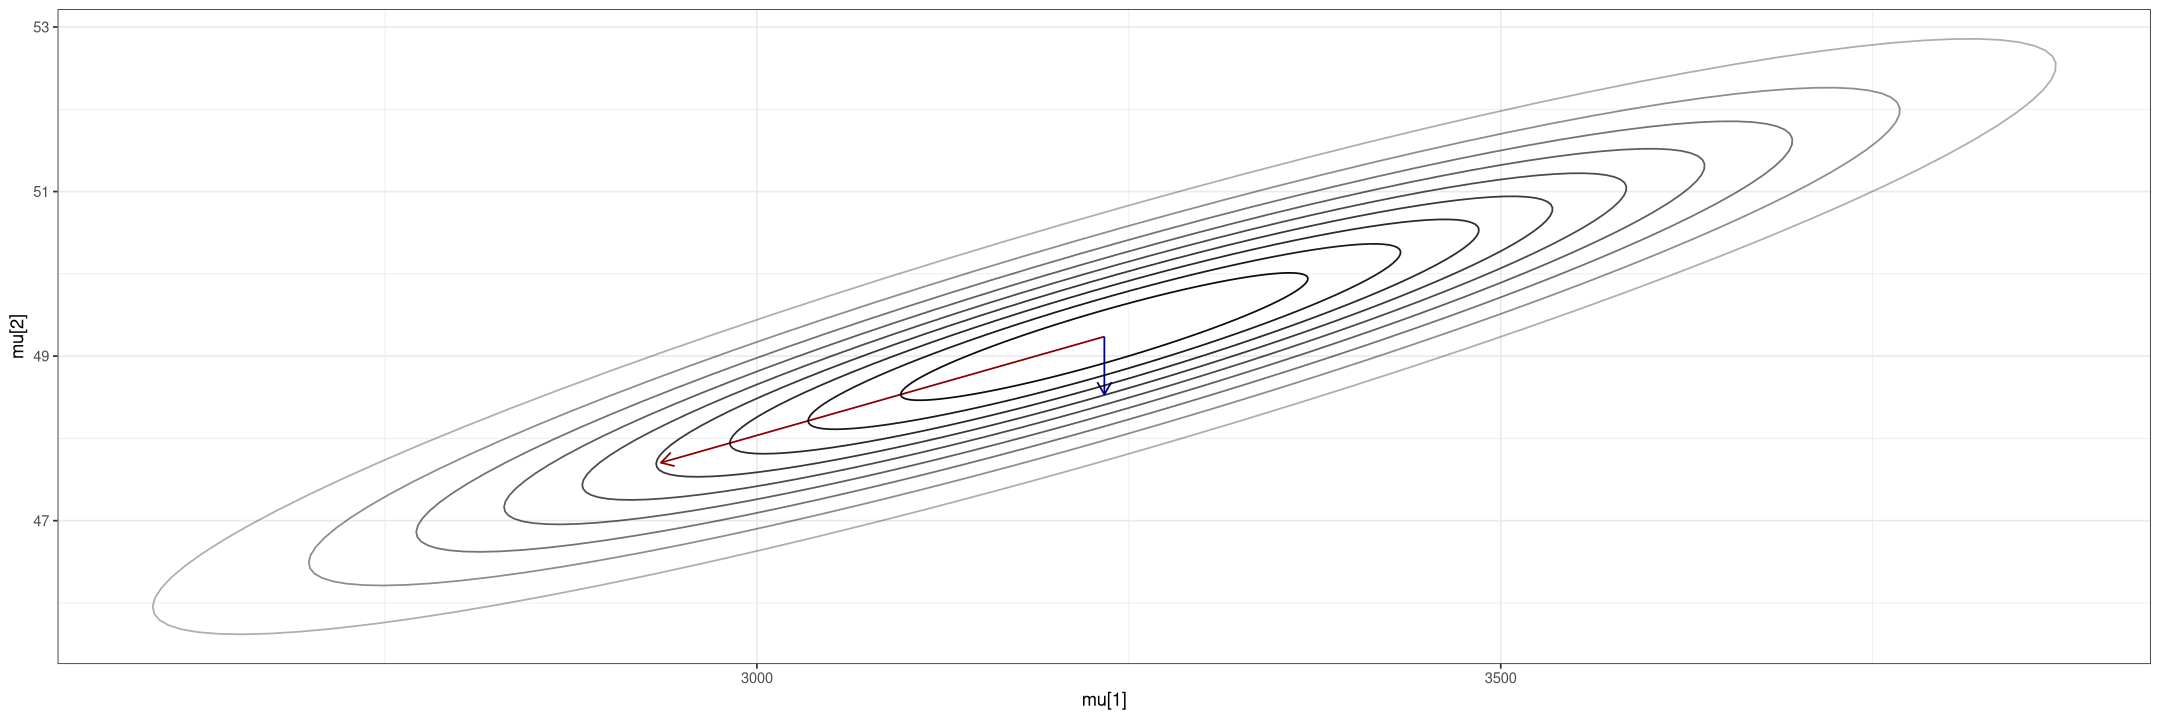

In [34]:
# R problems :)
µ = c(3233.54511, 49.23764)
𝞢 = matrix(c(88857.9955, 456.846100, 456.8461, 2.843767), nrow=2)
confidence.ellipse(as.numeric(µ), 𝞢)

How many children would score zero, one, and two, respectively? Illustrate this
classification on the graph and compare with the one obtained without considering
the heights of parents.

In [72]:
cat("2:", counts(data, µ, 𝞢, level = 0.68))
cat("1:", counts(data, µ, 𝞢, level = 0.95) - counts(data, µ, 𝞢, level = 0.68))
cat("\n0:", counts(data, µ, 𝞢, level = 0.997) - counts(data, µ, 𝞢, level = 0.95))

2: 0.6474443

1: 0.2673657
0: 0.04980341

Suppose that the father of a child is 185[cm] tall and mother is 178[cm] tall. Plot
the classification ellipsoids for their child.

In [36]:
# means
µWL = means[3:4]
µFM = means[1:2]

In [37]:
# covariances
𝞢WL = covrs[3:4, 3:4]
𝞢FM = covrs[1:2, 1:2]
𝞢WLFM = covrs[1:2, 3:4]
𝞢FMWL = covrs[3:4, 1:2]

In [38]:
µ = µWL + 𝞢FMWL %*% solve(𝞢FM) %*% (c(185, 178) - µFM)
𝞢 = 𝞢WL - (𝞢FMWL %*% solve(𝞢FM) %*% 𝞢WLFM) 

In [39]:
µ; 𝞢

Weight,4651.53730
Length,54.16829


,Weight,Length
Weight,88857.9955,456.846078
Length,456.8461,2.843767


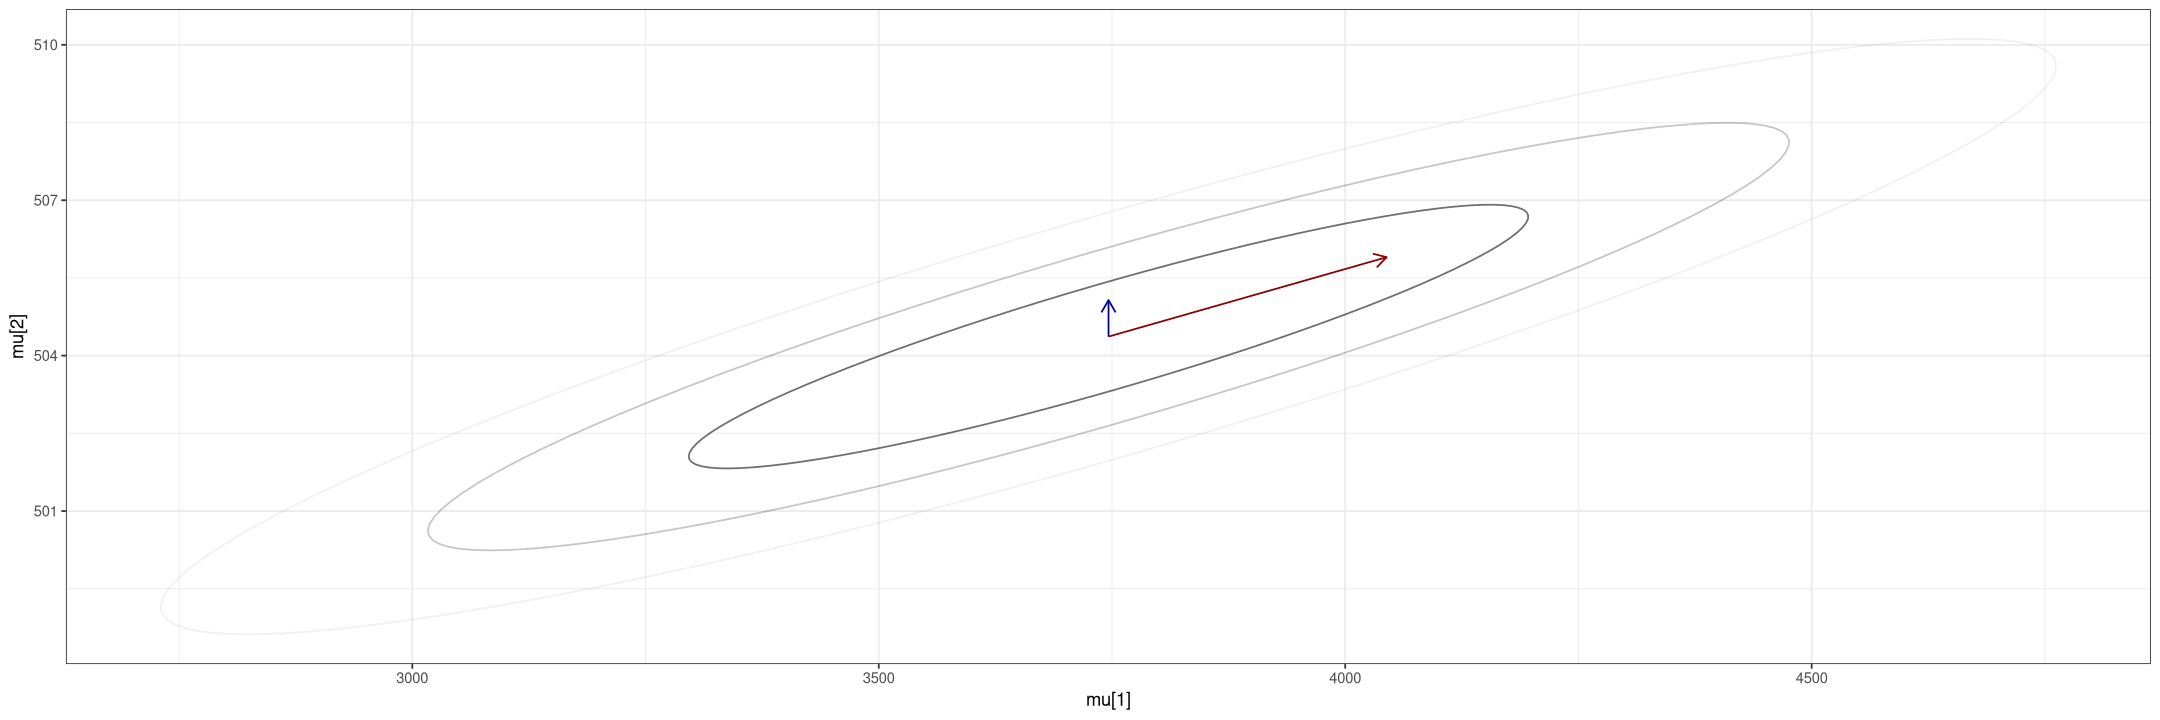

In [40]:
# R problems :)
µ = c(3746.2893, 504.3678)
𝞢 = matrix(c(88857.9955, 456.846078, 456.8461, 2.843767), nrow=2)
confidence.ellipse(as.numeric(µ), 𝞢, list(0.68, 0.95, 0.997))

Find spectral decomposition of the estimated covariance matrix for the complete
set of the data.

In [41]:
e = eigen(𝞢)
P = e$vectors
Λ = diag(e$values)

cat(
	"decomposition:",
	"\nP: ", P,
	"\nΛ: ", Λ
)

decomposition: 
P:  0.9999868 0.005141266 -0.005141266 0.9999868 
Λ:  88860.34 0 0 0.4949687

Transforme the data the according to $P^TX$. Plot scatter plots of the transformed
data.

In [42]:
px = as.matrix(data[c("Weight", "Length")]) %*% t(P)
colnames(px) = c("Weight", "Length")
dpx = as.data.frame(px)

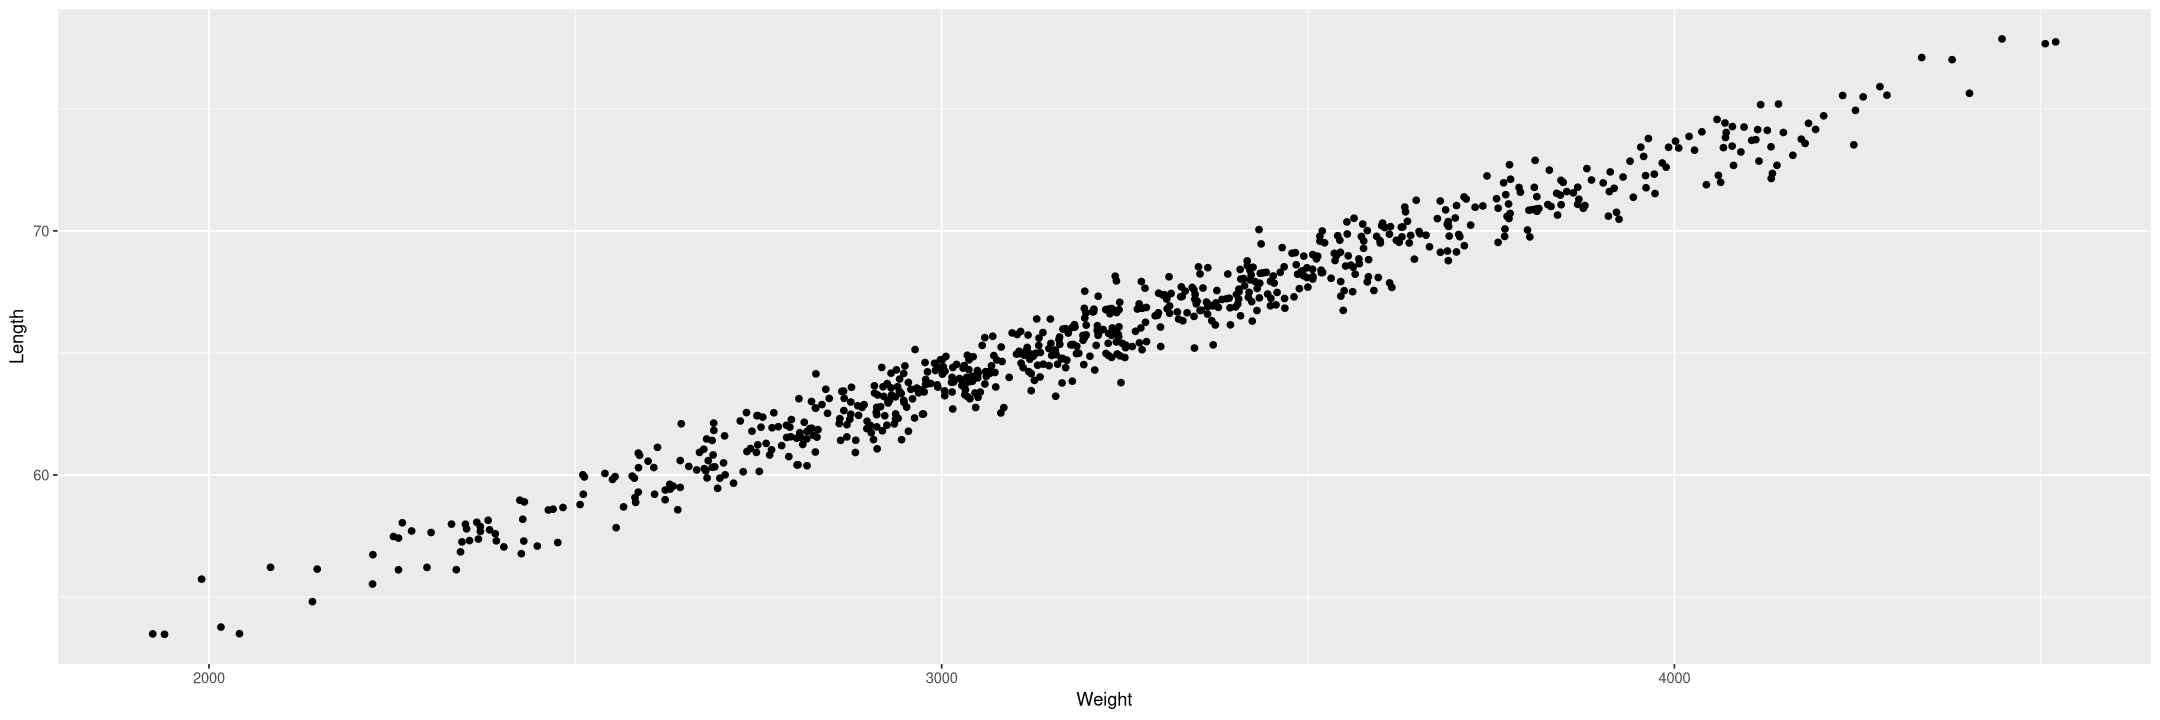

In [43]:
ggplot(dpx, aes(x=Weight, y=Length)) + geom_point()

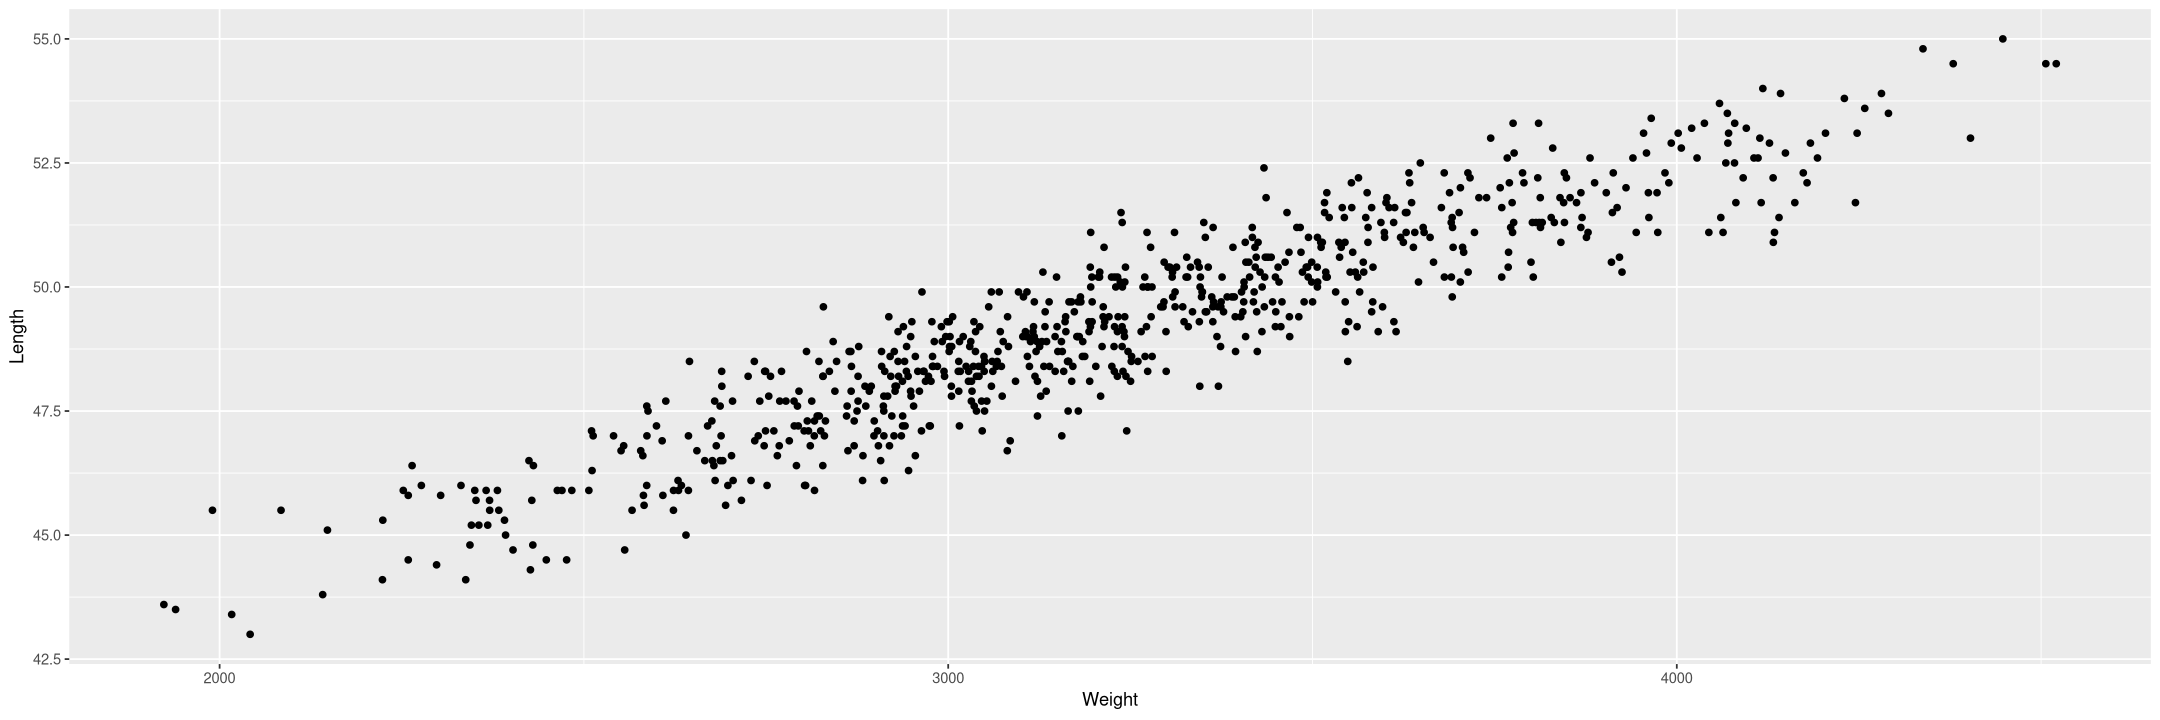

In [44]:
ggplot(data, aes(x=Weight, y=Length)) + geom_point()